<a href="https://colab.research.google.com/github/developer22-university/CyberBullying_on_Twitter/blob/main/ML_Notebook/new_cyber_bullying_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#to data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#NLP tools
import re
import string
from nltk.corpus import stopwords
import nltk
from nltk import corpus
import nltk.corpus as Corpus
# from nltk.corpus import stopwords
from nltk.corpus import stopwords
nltk.download("stopwords")
STOPWORDS = nltk.corpus.stopwords.words('english')
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
from time import time

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
import joblib



#train split and fit models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

#model selection
from sklearn.metrics import confusion_matrix, accuracy_score


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that ge

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## **Importing the [Kaggle](https://www.kaggle.com/mrmorj/hate-speech-and-offensive-language-dataset)  Dataset**

In [ ]:
df = pd.read_csv('public_data.csv',index_col=[0])
df.head(6)

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10671 entries, 0 to 10950
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   count               10671 non-null  int64 
 1   hate_speech         10671 non-null  int64 
 2   offensive_language  10671 non-null  int64 
 3   neither             10671 non-null  int64 
 4   class               10671 non-null  int64 
 5   tweet               10671 non-null  object
dtypes: int64(5), object(1)
memory usage: 583.6+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
count,10671.0,3.224440,0.845932,3.0,3.0,3.0,3.0,9.0
hate_speech,10671.0,0.329491,0.690646,0.0,0.0,0.0,0.0,7.0
offensive_language,10671.0,2.340737,1.379563,0.0,2.0,3.0,3.0,9.0
neither,10671.0,0.554212,1.122589,0.0,0.0,0.0,0.0,9.0
class,10671.0,1.094087,0.486898,0.0,1.0,1.0,1.0,2.0


In [ ]:
dt_trasformed = df[['class', 'tweet']]
y = dt_trasformed.iloc[:, :-1].values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


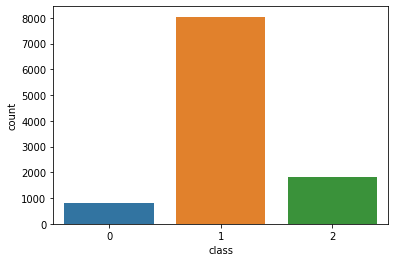

In [ ]:
sns.countplot(df['class'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


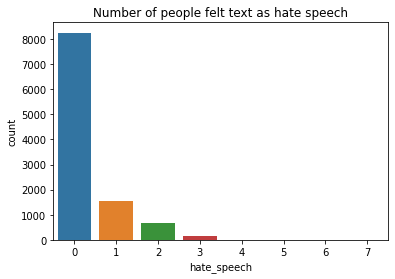

In [ ]:
sns.countplot(df['hate_speech'])
plt.title('Number of people felt text as hate speech')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


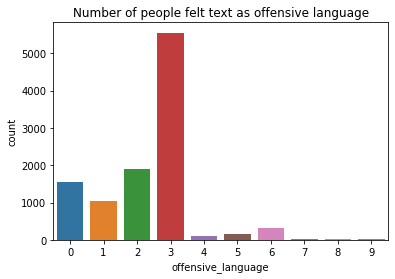

In [ ]:
sns.countplot(df['offensive_language'])
plt.title('Number of people felt text as offensive language')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


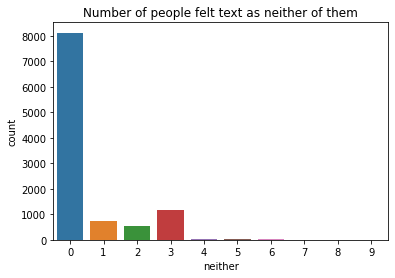

In [ ]:
sns.countplot(df['neither'])
plt.title('Number of people felt text as neither of them')
plt.show()

In [ ]:
def plot_dist(data):
    
    fig,ax = plt.subplots(1,2,figsize=(15,5))
    sns.distplot(data,ax=ax[0])
    sns.boxplot(data,ax=ax[1])
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


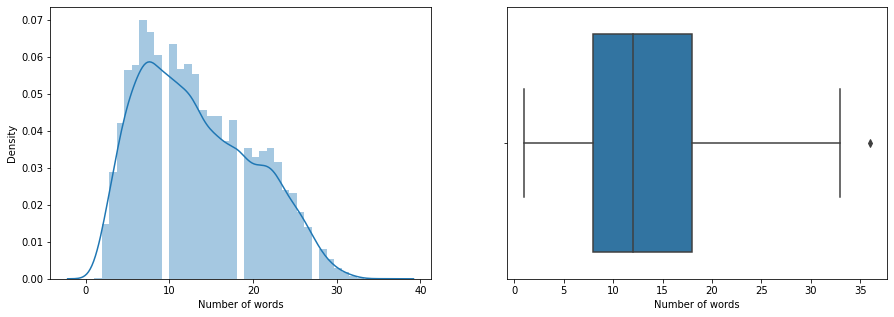

In [ ]:
# number of words
df['Number of words'] = df['tweet'].apply(lambda x: len(x.split(' ')))
plot_dist(df['Number of words']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


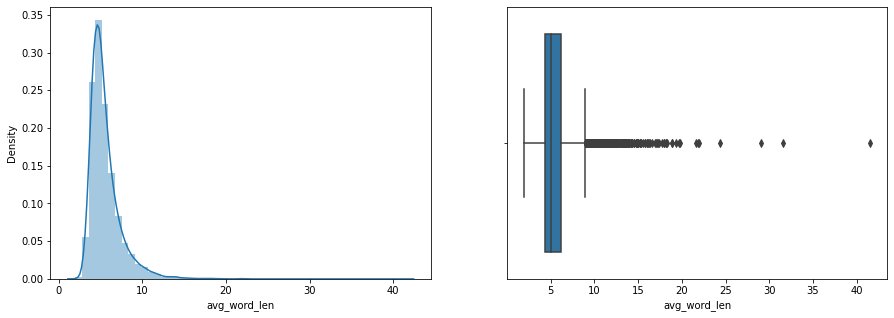

In [ ]:
# average word length
df['avg_word_len'] = df['tweet'].apply(lambda x: np.mean([len(c) for c in  x.split(' ')]))
plot_dist(df['avg_word_len']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


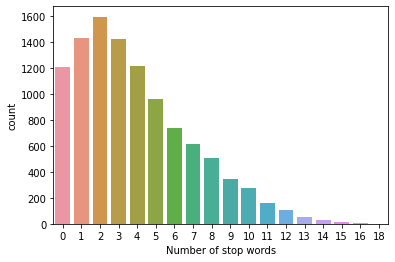

In [ ]:
# number of stopwords
df['Number of stop words'] = df['tweet'].apply(lambda x: len([c for c in x.split(' ') if c in STOPWORDS]))
sns.countplot(df['Number of stop words'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


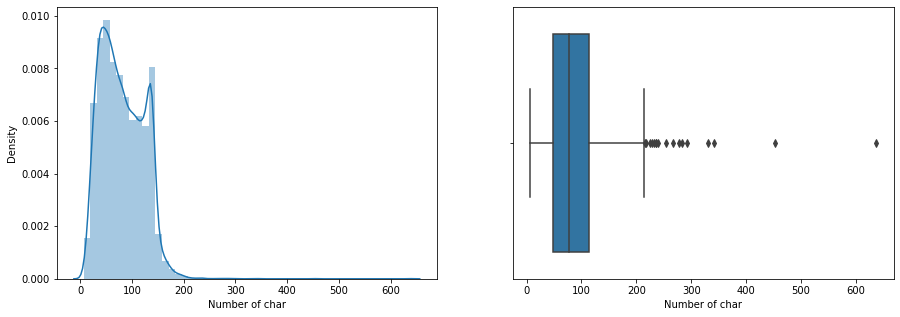

In [ ]:
# number of character count
df['Number of char'] = df['tweet'].apply(lambda x: len(x))
plot_dist(df['Number of char']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


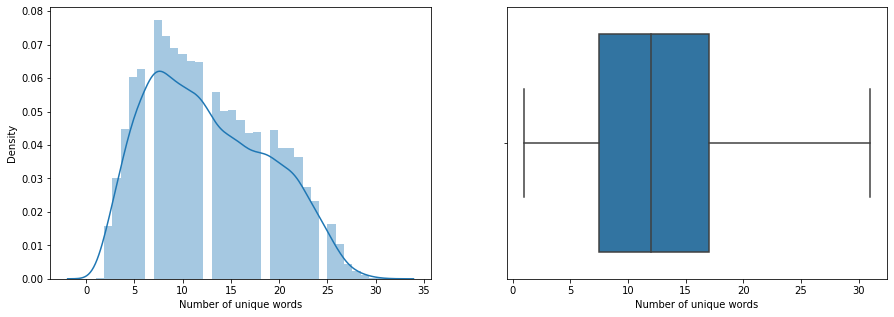

In [ ]:
# number of unique
df['Number of unique words'] = df['tweet'].apply(lambda x: len(set(x.split(' '))))
plot_dist(df['Number of unique words']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


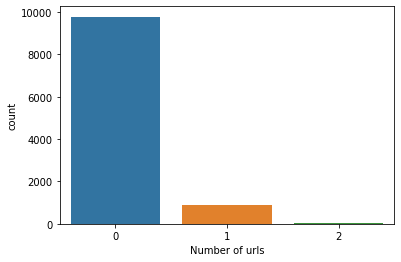

In [ ]:
# number of urls
df['Number of urls'] = df['tweet'].apply(lambda x: len(re.findall('https?',x)))
sns.countplot(df['Number of urls'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


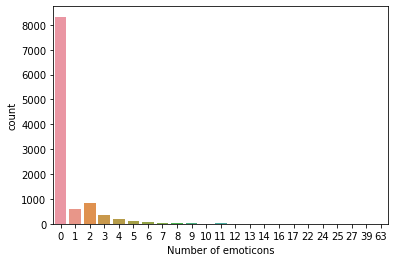

In [ ]:
# number of emoticons
df['Number of emoticons'] = df['tweet'].apply(lambda x: len(re.findall('&#[0-9]+;',x)))
sns.countplot(df['Number of emoticons'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


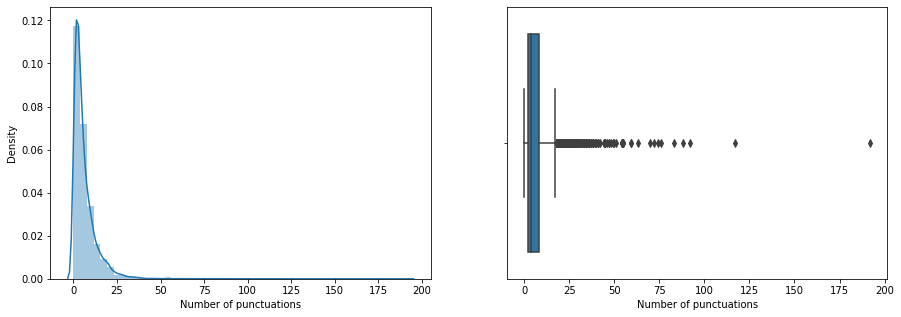

In [ ]:
# number of punctuations
df['Number of punctuations'] = df['tweet'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
plot_dist(df['Number of punctuations']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


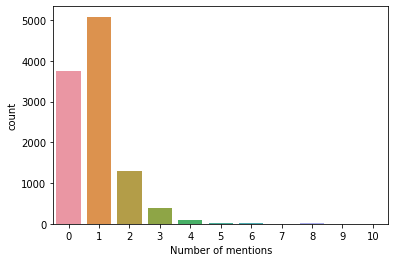

In [ ]:
# number of mentions
df['Number of mentions'] = df['tweet'].apply(lambda x: len(re.findall('@',x)))
sns.countplot(df['Number of mentions'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


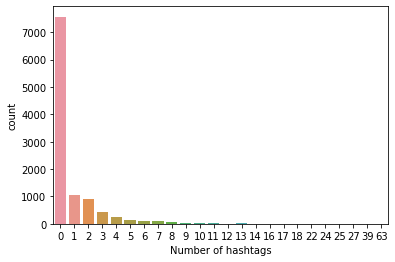

In [ ]:
# number of hastags
df['Number of hashtags'] = df['tweet'].apply(lambda x: len(re.findall('#',x)))
sns.countplot(df['Number of hashtags'])

**Encoding the Dependent Variable**

In [ ]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
y = np.array(ct.fit_transform(y))
print(y)

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


I separated this y in two variables that we will use to fit hate speech models and offensive speech models

In [ ]:
y_df = pd.DataFrame(y)
y_hate = np.array(y_df[0])
y_offensive = np.array(y_df[1])
print(y_hate)
print(y_offensive)

[0. 0. 0. ... 0. 1. 0.]
[0. 1. 1. ... 1. 0. 1.]


# **Cleaning the texts**

In [ ]:
y_df = pd.DataFrame(y)
y_hate = np.array(y_df[0])
y_offensive = np.array(y_df[1])
print(y_hate)
print(y_offensive)

[0. 0. 0. ... 0. 1. 0.]
[0. 1. 1. ... 1. 0. 1.]


In [ ]:
corpus=df['tweet']
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

# **Splitting the dataset into the Training set and Test set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_hate, test_size = 0.30, random_state = 0)

# ***Finding the best models to predict hate speech***

**Naive Bayes**

In [ ]:
classifier_np = GaussianNB()
classifier_np.fit(X_train, y_train)

GaussianNB()

**Decision Tree**

In [ ]:
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

**KNN**

In [ ]:
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

**Logistic Regression**

In [ ]:
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

**Random Forest Classifier**

In [ ]:
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

**SVM Classifier**


In [ ]:
classifier_svm = svm.SVC()
classifier_svm.fit(X_train, y_train)

SVC()

**XGBoost Classifier**

In [ ]:
classifier_xgb= XGBClassifier()
classifier_xgb.fit(X_train, y_train)

XGBClassifier()

**Stochastic Gradient Classifier**

In [ ]:
classifier_sgd= SGDClassifier()
classifier_sgd.fit(X_train, y_train)

**Adaboost Classifier**

In [ ]:
classifier_ab= AdaBoostClassifier()
classifier_ab.fit(X_train, y_train)


AdaBoostClassifier()

**Making the Confusion Matrix for each model**

In [ ]:
#Naive Bayes
y_pred_np = classifier_np.predict(X_test)
cm = confusion_matrix(y_test, y_pred_np)
print(cm)

[[2668  603]
 [ 182   69]]


In [ ]:
#KNN
y_pred_knn = classifier_knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

[[3221   50]
 [ 218   33]]


In [ ]:
#XGBoost Classifier
y_pred_xgb = classifier_xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred_xgb)
print(cm)

[[3265    6]
 [ 238   13]]


In [ ]:
#SVM
y_pred_svm = classifier_svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred_svm)
print(cm)

[[3271    0]
 [ 250    1]]


In [ ]:
#Logistic Regression
y_pred_lr=classifier_lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

[[3230   41]
 [ 203   48]]


In [ ]:
#Decision Tree
y_pred_dt = classifier_dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)

[[3137  134]
 [ 166   85]]


In [ ]:
#Random Forest
y_pred_rf = classifier_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)


[[3246   25]
 [ 230   21]]


In [ ]:
#Stochastic Gradient 
y_pred_sgd=classifier_sgd.predict(X_test)
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

In [ ]:
#Ada Boost
y_pred_ab=classifier_ab.predict(X_test)
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

[[3230   41]
 [ 203   48]]


In [ ]:
rf_score = accuracy_score(y_test, y_pred_rf)
knn_score = accuracy_score(y_test, y_pred_knn)
svm_score = accuracy_score(y_test, y_pred_svm)
xgb_score = accuracy_score(y_test, y_pred_xgb)
lr_score = accuracy_score(y_test, y_pred_lr)
dt_score = accuracy_score(y_test, y_pred_dt)
np_score = accuracy_score(y_test, y_pred_np)
sgd_score = accuracy_score(y_test, y_pred_sgd)
ab_score = accuracy_score(y_test, y_pred_ab)


print('Random Forest Accuracy: ', str(rf_score))
print('K Nearest Neighbours Accuracy: ', str(knn_score))
print('Support Vector Machine Accuracy: ', str(svm_score))
print('XGBoost Classifier Accuracy: ', str(xgb_score))
print('Logistic Regression Accuracy: ',str(lr_score))
print('Decision Tree Accuracy: ', str(dt_score))
print('Naive Bayes Accuracy: ', str(np_score))
print('Stochastic Gradient Classifier Accuracy: ', str(sgd_score))
print('AdaBoost Classifier Accuracy: ', str(ab_score))

Random Forest Accuracy:  0.9275979557069847
K Nearest Neighbours Accuracy:  0.9239068710959683
Support Vector Machine Accuracy:  0.9290176036342986
XGBoost Classifier Accuracy:  0.9307211811470755
Logistic Regression Accuracy:  0.9307211811470755
Decision Tree Accuracy:  0.9148211243611585
Naive Bayes Accuracy:  0.7771152754116979
AdaBoost Classifier Accuracy:  0.9287336740488359


In [ ]:
results.reset_index(drop = True)

In [ ]:
results.describe().loc[['min', 'max'], :]

In [ ]:
best_acc = results[results['Accuracy: Test'] == results['Accuracy: Test'].max()]
best_f1 = results[results['F1 Score: Test'] == results['F1 Score: Test'].max()]
best_precision = results[results['Precision: Test'] == results['Precision: Test'].max()]
best_recall = results[results['Recall: Test'] == results['Recall: Test'].max()]

So XGBoost Classifier looks better to predict hate speech based on this dataset. It's important to emphasize Random Forest, AdaBoost, KNN and Decision Tree had great results as well. This Dataset looks like a product of artificial intelligence to classify hate and offensive speech.

In [ ]:
#Now finally saving the model with XGB Classifier.
import joblib
joblib.dump(classifier_xgb, 'hatespeech.pkl')

['hatespeech.pkl']